In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import networkx as nx
import matplotlib.colors as mcolors
# warnings.simplefilter(action='ignore', category=FutureWarning)
# pd.set_option('display.max_rows', None)  # To display all rows
# pd.set_option('display.max_columns', None)  # To display all columns
import glob as glob
import math
from datetime import datetime 
import seaborn as sns

I. DX codes: 
* All of A4 data is CN (1)
* For ADNI (1=NL;2=MCI;3=AD)

II. Data dictionary codes for demo data adni dictionary 
* Gender codes: male = 1 , female = 2 
* Race codes: 1=American Indian or Alaskan Native; 2=Asian; 3=Native Hawaiian or Other Pacific Islander; 4=Black or African American; 5=White; 6=More than one race; 7=Unknown
* Ethnicity codes: 1=Hispanic or Latino; 2=Not Hispanic or Latino; 3=Unknown
* Education codes: not sure 

In [107]:
a4_demo = pd.read_csv('../../mci_mri_graph/data_paths_and_cleaning/data/demographic_csvs/A4/a4_filtered_demo.csv')
adni_demo = pd.read_csv('../../mci_mri_graph/data_paths_and_cleaning/data/demographic_csvs/ADNI/adni_filtered_demo.csv')

In [108]:
print(a4_demo.columns)

Index(['RID', 'PTGENDER', 'PTAGE', 'PTETHNIC', 'PTEDUCAT', 'PTRACE', 'DX'], dtype='object')


In [109]:
print(adni_demo)

      RID  PTGENDER        AGE  PTETHCAT  PTEDUCAT  PTRACCAT  DX
0      31       2.0  83.750000       2.0      18.0         5   2
1     112       1.0  76.666667       2.0      18.0         5   1
2     120       1.0  79.083333       2.0      20.0         5   2
3     210       2.0  78.500000       2.0      13.0         5   2
4     377       1.0  85.166667       2.0      16.0         5   2
..    ...       ...        ...       ...       ...       ...  ..
393  7054       2.0  72.250000       2.0      18.0         5   2
394  7079       2.0  86.750000       2.0      18.0         4   1
395  7088       1.0  70.000000       2.0      16.0         5   1
396  7100       1.0  74.000000       2.0      16.0         4   3
397  7105       1.0  77.500000       1.0      18.0         6   2

[398 rows x 7 columns]


In [110]:
print(adni_demo['PTRACCAT'].unique())

[5 6 4 2 7]


Creating readable figures with labels - use a dictionary to reassign labels to categorical variable names

In [111]:
#data dictionary mappings 
gender_dict = {1: 'Male', 2: 'Female'}
race_dict = {
    1: 'American Indian or Alaskan Native',
    2: 'Asian',
    3: 'Native Hawaiian or Other Pacific Islander',
    4: 'Black or African American',
    5: 'White',
    6: 'More than one race',
    7: 'Unknown'
}
ethnicity_dict = {1: 'Hispanic or Latino', 2: 'Not Hispanic or Latino', 3: 'Unknown'}
# Assuming PTEDUCAT codes - replace these with actual values later
# education_dict = {1: 'Less than high school', 2: 'High school graduate', 3: 'Some college', 4: 'College graduate', 5: 'Postgraduate'}

dx_dict = {1: "NC", 2:'MCI',3: "DE"}

# Apply mappings to dataframe columns
adni_demo['PTGENDER'] = adni_demo['PTGENDER'].map(gender_dict)
adni_demo['PTRACCAT'] = adni_demo['PTRACCAT'].map(race_dict)
adni_demo['PTETHCAT'] = adni_demo['PTETHCAT'].map(ethnicity_dict)
adni_demo['DX']=adni_demo['DX'].map(dx_dict)


In [112]:
print(adni_demo['DX'])

0      MCI
1       NC
2      MCI
3      MCI
4      MCI
      ... 
393    MCI
394     NC
395     NC
396     DE
397    MCI
Name: DX, Length: 398, dtype: object


In [113]:
#check for nans 
print(adni_demo['DX'].isna().any())

False


* ADNI Demographic Plots 

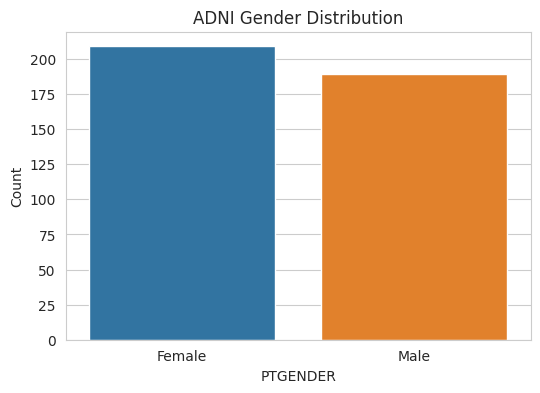

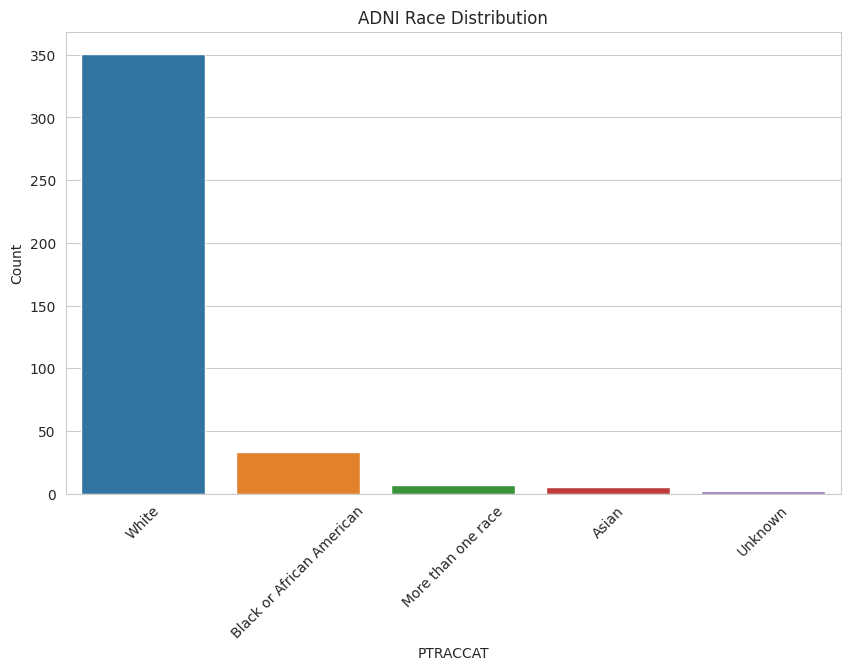

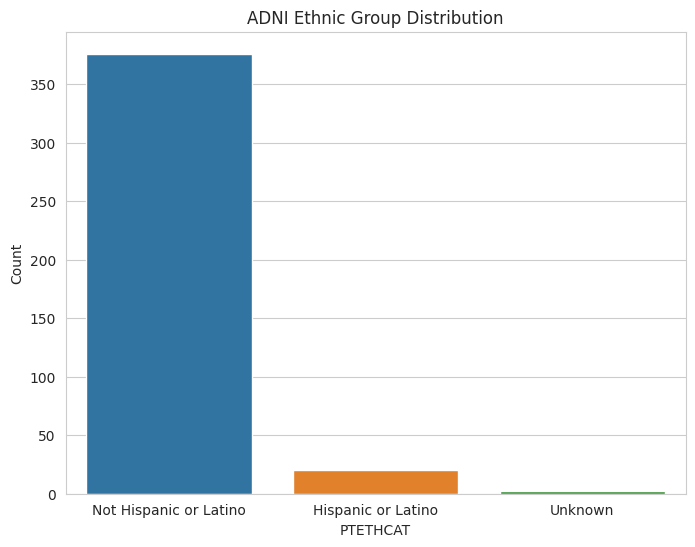

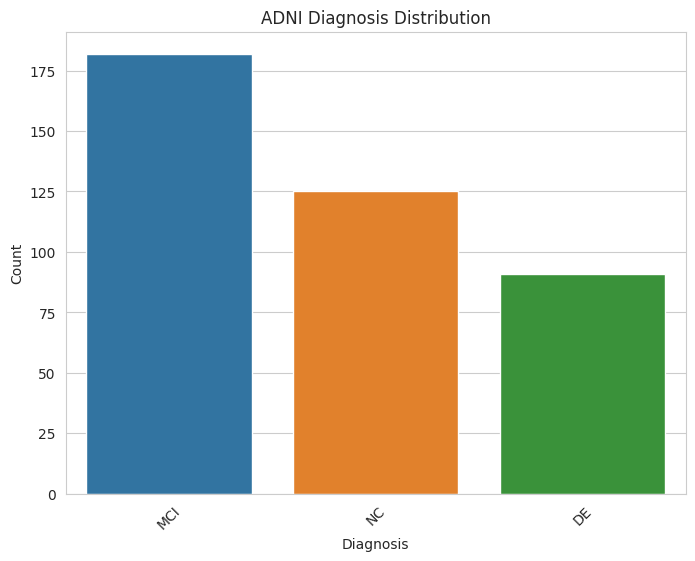

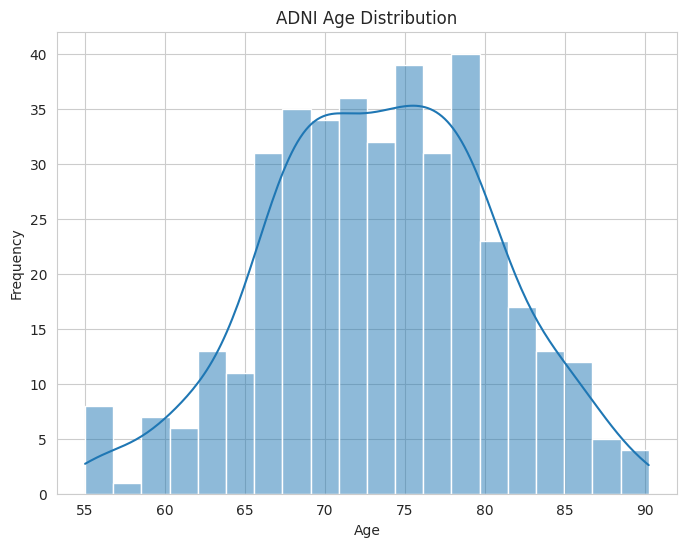

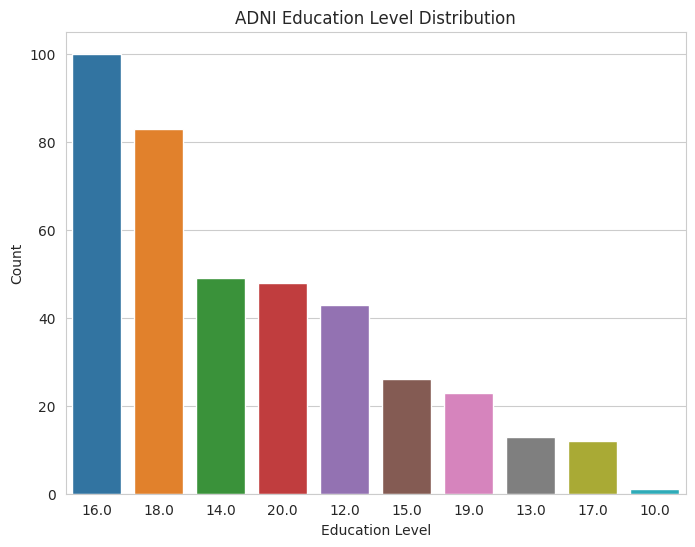

In [114]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# PTGENDER - Bar Chart
plt.figure(figsize=(6, 4))
sns.countplot(x='PTGENDER', data=adni_demo, order=adni_demo['PTGENDER'].value_counts().index)
plt.title('ADNI Gender Distribution')
plt.ylabel('Count')
plt.show()

# PTRACE - Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(x='PTRACCAT', data=adni_demo, order=adni_demo['PTRACCAT'].value_counts().index)
plt.title('ADNI Race Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

# PTETHNIC - Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x='PTETHCAT', data=adni_demo, order=adni_demo['PTETHCAT'].value_counts().index)
plt.title('ADNI Ethnic Group Distribution')
plt.ylabel('Count')
plt.show()

#dx 

# DX - Bar Chart for Diagnoses
plt.figure(figsize=(8, 6))
sns.countplot(x='DX', data=adni_demo, order=adni_demo['DX'].value_counts().index)
plt.title('ADNI Diagnosis Distribution')
plt.xticks(rotation=45)
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


#Age distribution 
# PTAGE - Histogram
plt.figure(figsize=(8, 6))
sns.histplot(adni_demo['AGE'], bins=20, kde=True)  # KDE=True adds a density line
plt.title('ADNI Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# PTEDUCAT - Ordered Bar Chart
plt.figure(figsize=(8, 6))
# Assuming PTEDUCAT contains ordered categories; if not, sort_values or order parameter may be needed
sns.countplot(x='PTEDUCAT', data=adni_demo, order = adni_demo['PTEDUCAT'].value_counts().index)
plt.title('ADNI Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

* A4 Demographic Plots

* Apply variable mapping 

In [115]:
print(a4_demo)

           RID  PTGENDER  PTAGE  PTETHNIC  PTEDUCAT PTRACE  DX
0    B10423472         2  78.25         2      19.0      5   1
1    B10693248         2  65.94         2      16.0      5   1
2    B10709603         1  74.15         2      18.0      5   1
3    B10795731         1  69.23         2      18.0      5   1
4    B10904689         2  68.21         2      13.0      5   1
..         ...       ...    ...       ...       ...    ...  ..
368  B99525373         2  67.00         2      20.0      5   1
369  B99649691         2  65.31         2      16.0      5   1
370  B99696480         2  74.41         2      12.0      5   1
371  B99860801         1  71.56         2      18.0      2   1
372  B99870985         1  71.32         2      14.0      5   1

[373 rows x 7 columns]


In [116]:
a4_demo = pd.read_csv('../../mci_mri_graph/data_paths_and_cleaning/data/demographic_csvs/A4/a4_filtered_demo.csv')

In [117]:
print(a4_demo['PTRACE'].unique())
#potentially replace this with 6 which indicates more than one race


['5' '4' '2' '6' '1:5' '4:5']


In [118]:
#replace 1:5 and 4:5 with 6  for 'more than one race' 

# Replace '1:5' and '4:5' with 6 (more than one race)
a4_demo['PTRACE'] = a4_demo['PTRACE'].replace(['1:5', '4:5'], '6')

# Convert the column to integer type
a4_demo['PTRACE'] = a4_demo['PTRACE'].astype(int)

# Print the unique values in the 'PTRACE' column to verify
print(a4_demo['PTRACE'].unique())


[5 4 2 6]


In [119]:
nan_rows = a4_demo[a4_demo['PTRACE'].isna()]
print(nan_rows)


Empty DataFrame
Columns: [RID, PTGENDER, PTAGE, PTETHNIC, PTEDUCAT, PTRACE, DX]
Index: []


In [120]:
#data dictionary mappings 
a4_gender_dict = {1: 'Male', 2: 'Female'}
a4_race_dict = {
    1: 'American Indian or Alaskan Native',
    2: 'Asian',
    3: 'Native Hawaiian or Other Pacific Islander',
    4: 'Black or African American',
    5: 'White',
    6: 'More than one race',
    7: 'Unknown'
}
a4_ethnicity_dict = {1: 'Hispanic or Latino', 2: 'Not Hispanic or Latino', 3: 'Unknown'}
# Assuming PTEDUCAT codes - replace these with actual values later
# education_dict = {1: 'Less than high school', 2: 'High school graduate', 3: 'Some college', 4: 'College graduate', 5: 'Postgraduate'}

a4_dx_dict = {1: "NC", 2:'MCI',3: "DE"}

# Apply mappings to dataframe columns
a4_demo['PTGENDER'] = a4_demo['PTGENDER'].map(a4_gender_dict)
a4_demo['PTRACE'] = a4_demo['PTRACE'].map(a4_race_dict)
a4_demo['PTETHNIC'] = a4_demo['PTETHNIC'].map(a4_ethnicity_dict)
a4_demo['DX']=a4_demo['DX'].map(a4_dx_dict)


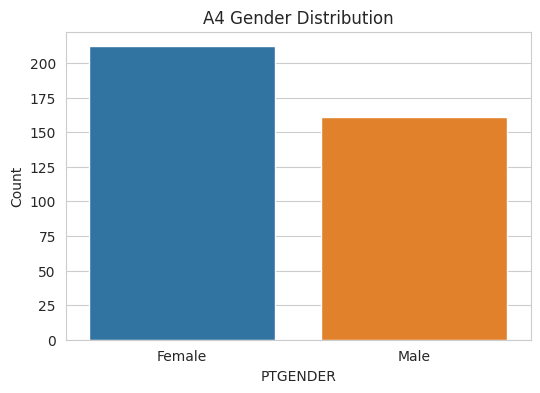

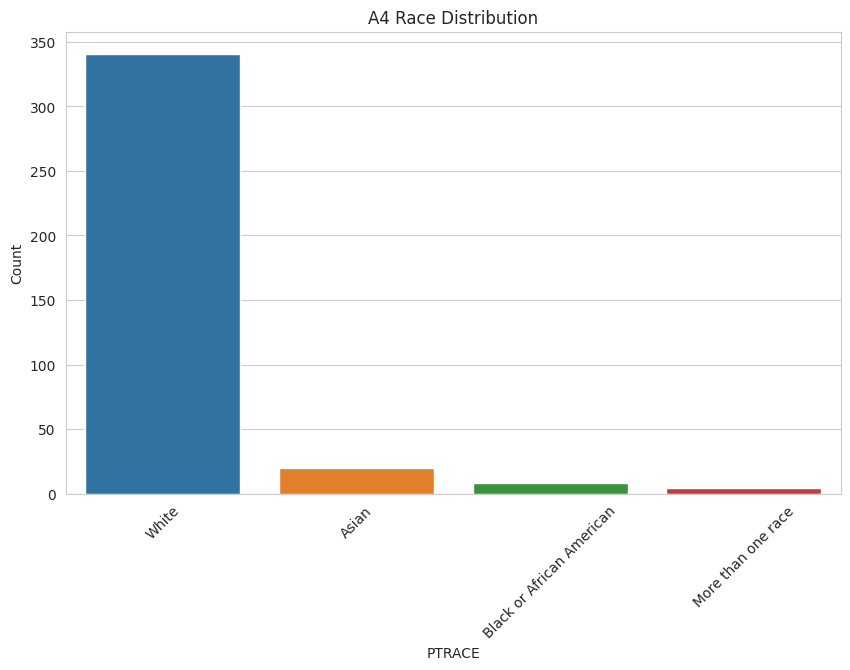

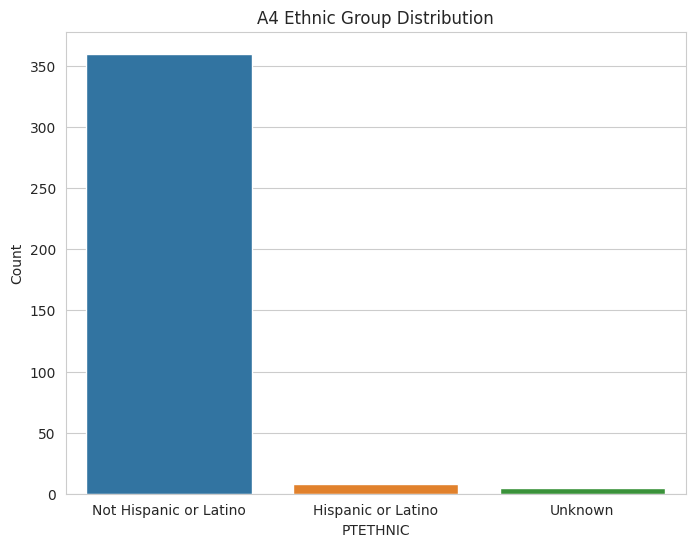

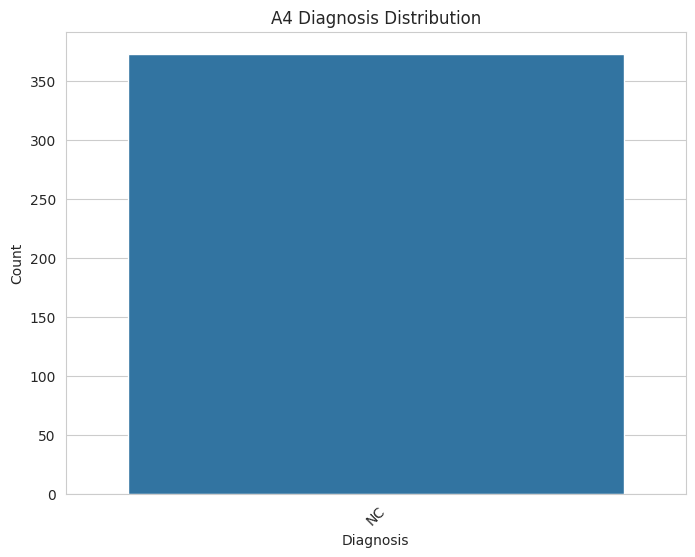

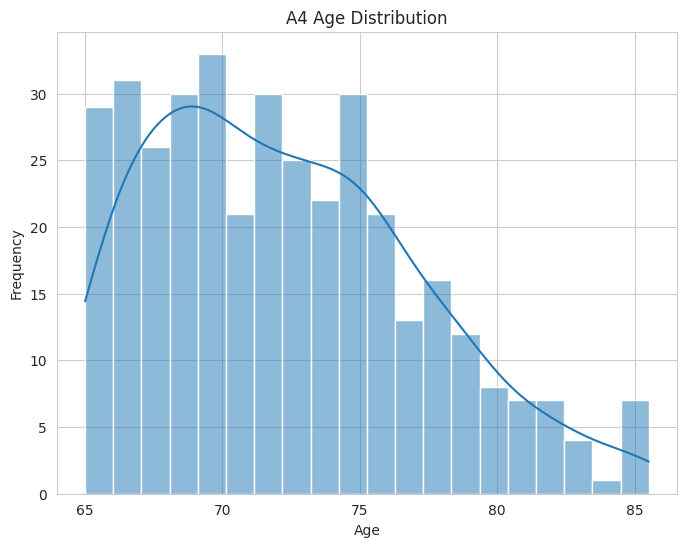

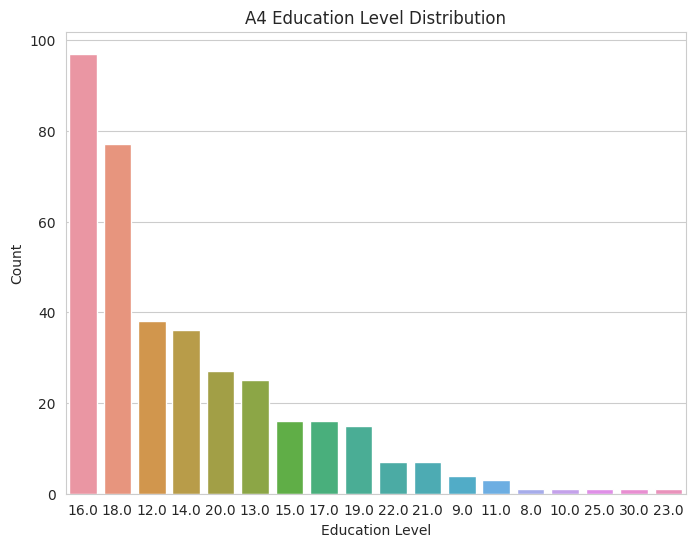

In [121]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# PTGENDER - Bar Chart
plt.figure(figsize=(6, 4))
sns.countplot(x='PTGENDER', data=a4_demo, order=a4_demo['PTGENDER'].value_counts().index)
plt.title('A4 Gender Distribution')
plt.ylabel('Count')
plt.show()

# PTRACE - Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(x='PTRACE', data=a4_demo, order=a4_demo['PTRACE'].value_counts().index)
plt.title('A4 Race Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

# PTETHNIC - Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x='PTETHNIC', data=a4_demo, order=a4_demo['PTETHNIC'].value_counts().index)
plt.title('A4 Ethnic Group Distribution')
plt.ylabel('Count')
plt.show()

#dx 

# DX - Bar Chart for Diagnoses
plt.figure(figsize=(8, 6))
sns.countplot(x='DX', data=a4_demo, order=a4_demo['DX'].value_counts().index)
plt.title('A4 Diagnosis Distribution')
plt.xticks(rotation=45)
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


#Age distribution 
# PTAGE - Histogram
plt.figure(figsize=(8, 6))
sns.histplot(a4_demo['PTAGE'], bins=20, kde=True)  # KDE=True adds a density line
plt.title('A4 Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# PTEDUCAT - Ordered Bar Chart
plt.figure(figsize=(8, 6))
# Assuming PTEDUCAT contains ordered categories; if not, sort_values or order parameter may be needed
sns.countplot(x='PTEDUCAT', data=a4_demo, order = a4_demo['PTEDUCAT'].value_counts().index)
plt.title('A4 Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()